In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool

df = pd.read_csv('/home/sary/cms-downloader/cms_downloads/Winter 2022/Data Engineering and Visualization/Project1/Car_sale_ads.csv')

In [2]:
df.head(10)

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
5,5,62950,PLN,Used,Abarth,595,NaN,NaN,2016,46060.0,...,Manual,small_cars,3.0,gray,Germany,Yes,15/03/2016,30/04/2021,"Modlińska 157 - 03-186 Warszawa, Białołęka (Po...","['ABS', 'Electric front windows', 'Drivers air..."
6,6,69900,PLN,Used,Abarth,595,NaN,NaN,2021,2900.0,...,Manual,small_cars,2.0,black,Germany,NaN,25/02/2021,29/04/2021,"Żary, żarski, Lubuskie",[]
7,7,69900,PLN,Used,Abarth,500,NaN,NaN,2019,20000.0,...,Manual,small_cars,3.0,white,Poland,Yes,NaN,29/04/2021,"Ojcowska 2 - 02-918 Warszawa, Mokotów (Polska)","['ABS', 'Electrically adjustable mirrors', 'Pa..."
8,8,120750,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."
9,9,93100,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,03/05/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [3]:
print(df.shape)
df.info()


(208304, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   floa

In [4]:
# null count
null_values = df.isnull().sum()
null_values

Index                           0
Price                           0
Currency                        0
Condition                       0
Vehicle_brand                   0
Vehicle_model                   0
Vehicle_version             70222
Vehicle_generation          60444
Production_year                 0
Mileage_km                    983
Power_HP                      643
Displacement_cm3             1966
Fuel_type                       0
CO2_emissions              114257
Drive                       15076
Transmission                  479
Type                            0
Doors_number                 1487
Colour                          0
Origin_country              89992
First_owner                143210
First_registration_date    121859
Offer_publication_date          0
Offer_location                  0
Features                        0
dtype: int64

In [5]:
# total number of cells
total_cells = np.product(df.shape)
total_missing = null_values.sum()
total_missing
print(f'total missing data: {total_missing/total_cells * 100}%')

total missing data: 11.917543590137491%


First owner option in the creation of the car ad is not required option(checkbox) so,
If you are not the first owner you will leave it which leads to null, and if you are then you will check it.
So replacing them with False will be suitable.

In [6]:

# replacing nulls in First_owner with False.
df['First_owner']=df['First_owner'].fillna(False)

#change yes in this column to True.
df['First_owner']=df['First_owner'].replace(['yes'],True)

#change the dtype of First_owner to bool.
df = df.astype({'First_owner':bool})

# drop First_registration_date as it contains > 58% missing data and can't be predicted from the other columns.
df.drop(columns=['First_registration_date'],inplace=True)

Some vehicle brands or models don't have version, so the only option is to choose: "I can't find my version" so we can replace it with "No version".
Also if you don't have version you will not have the generation.

Lets see the number of models that don't have version at all the rows.

Option#1 is to remove these columns as it contains 33% null values.
Option#2 is to replace nulls with "No version" as alternative value.


In [7]:
# Group the entries by the vehicle model (to count all the models we have)
groupByModel = df.groupby('Vehicle_model')


# remove the rows that contain nulls in the column Vehicle_version.
dfFilteredVersion = df[df['Vehicle_version'].notnull()]

# Use the filtered dataset to count number of models that have atleast one notnull value.
groupByAfterFilter = dfFilteredVersion.groupby('Vehicle_model')

print(groupByModel.sum().shape, groupByAfterFilter.sum().shape)

(1203, 9) (876, 9)


876 model that have Version but the seller just didn't enter it, and 327 model don't have any model.
So now we can remove this column as many sellers don't enter this value.(33% null values for Vehicle_version)

~30% null values at Vehicle_generation , it will be useless to drop Version and estimate the Generation as they are dependant.

In [8]:
total_rows = df.shape[0]
missing_Version = df[df['Vehicle_version'].isnull()].shape[0]
print(f'{missing_Version/total_rows * 100} % null values at Vehicle_version')

missing_Generation = df[df['Vehicle_generation'].isnull()].shape[0]
print(f'{missing_Generation/total_rows * 100} % null values at Vehicle_generation')

33.711306551962515 % null values at Vehicle_version
29.017205622551657 % null values at Vehicle_generation


In [9]:
# drop Vehicle_version column
df.drop(columns=['Vehicle_version'],inplace=True)

# drop Vehicle_generation column
df.drop(columns=['Vehicle_generation'], inplace=True)

CO2_emissions has ~55% null values and can't be predicted so removing this column will help.

In [10]:
# percentage of missing values at the column CO2 emissions
missing_CO2 = df[df['CO2_emissions'].isnull()].shape[0]
print(f'{missing_CO2/total_rows * 100} % null values at CO2_emissions')

54.851083032490976 % null values at CO2_emissions


In [11]:
# drop CO2_emissions
df.drop(columns=['CO2_emissions'],inplace=True)

Origin_country has ~43% null values and can't be predicted so removing this column will help.

In [12]:
# percentage of missing values at the column Origin_country
missing_Origin_country = df[df['Origin_country'].isnull()].shape[0]
print(f'{missing_Origin_country/total_rows * 100} % null values at Origin_country')

43.20224287579691 % null values at Origin_country


In [13]:
# drop Origin_country
df.drop(columns=['Origin_country'],inplace=True)

In [14]:
df.shape

(208304, 20)

In [15]:
null_values = df.isnull().sum()
null_values

Index                         0
Price                         0
Currency                      0
Condition                     0
Vehicle_brand                 0
Vehicle_model                 0
Production_year               0
Mileage_km                  983
Power_HP                    643
Displacement_cm3           1966
Fuel_type                     0
Drive                     15076
Transmission                479
Type                          0
Doors_number               1487
Colour                        0
First_owner                   0
Offer_publication_date        0
Offer_location                0
Features                      0
dtype: int64

Drive column is left optionally in the ad,but we can know it from the (car brand + vehicle model) columns.
and the rest of the rows which can't be estimated will replace it with "front_wheel".

In [16]:
df['Drive']

0         Front wheels
1         Front wheels
2                  NaN
3         Front wheels
4                  NaN
              ...     
208299             NaN
208300     Rear wheels
208301             NaN
208302             NaN
208303             NaN
Name: Drive, Length: 208304, dtype: object

In [17]:
# Save for each (car_brand + model) the drive of the car
df_filtered_drive = df.dropna(subset=['Drive'])
brand_modelToDrive = {}
for i in (df_filtered_drive['Index']):
    brand = df_filtered_drive.at[i,'Vehicle_brand']
    model = df_filtered_drive.at[i,'Vehicle_model']
    drive = df_filtered_drive.at[i,'Drive']
    brand_modelToDrive[brand+model] = drive


Now let's assign the drive that is not found with the corresponding brand+model

In [18]:
dfOnlyNulls = df.loc[df['Drive'].isnull()]
estimated_efficiently = 0
for i in dfOnlyNulls['Index']:
    brand = df.at[i, 'Vehicle_brand']
    model = df.at[i,'Vehicle_model']

    if (brand+model) in brand_modelToDrive.keys():
        df.at[i, 'Drive'] = brand_modelToDrive[brand+model]
        estimated_efficiently +=1
    else:
        df.at[i, 'Drive'] = 'Front wheels'
print(estimated_efficiently)

14941


Wow we have 14941 Drive type prestored in our dataframe, and replaced correctly.
Only 135 rows will be replaced with Front wheel as we don't have drivetype for its brand+model. 

In [19]:
df.isnull().sum()

Index                        0
Price                        0
Currency                     0
Condition                    0
Vehicle_brand                0
Vehicle_model                0
Production_year              0
Mileage_km                 983
Power_HP                   643
Displacement_cm3          1966
Fuel_type                    0
Drive                        0
Transmission               479
Type                         0
Doors_number              1487
Colour                       0
First_owner                  0
Offer_publication_date       0
Offer_location               0
Features                     0
dtype: int64

Observe that the currency is not only in PLN but 270 rows is in EUR.
We will convert the EUR to PLN.
1 EUR = 4.69 PLN at 1 December 2022


In [20]:
print(df['Currency'].value_counts())

PLN    208034
EUR       270
Name: Currency, dtype: int64


In [21]:
df_EUR = df.loc[df['Currency'] == 'EUR']
for i in df_EUR['Index']:
    df.at[i, 'Price'] = df.at[i, 'Price'] * 4.69

Let's see columns [Price, Production_year, Mileage_km, Power_HP] with boxplot.

In [22]:
droped_df = df.dropna()

Remove outliers for displacement_cm3.

In [23]:
droped_df.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,204060.000000,2.040600e+05,204060.000000,2.040600e+05,204060.000000,204060.000000,204060.000000
mean,104266.333069,6.172293e+04,2012.016270,1.514084e+05,151.164795,1882.652195,4.636470
std,60125.129336,8.642599e+04,6.957472,2.960786e+06,76.521290,729.235226,0.769058
min,0.000000,5.850000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000
25%,52278.750000,1.750000e+04,2008.000000,5.530000e+04,105.000000,1461.000000,5.000000
50%,104208.500000,3.499900e+04,2012.000000,1.453230e+05,136.000000,1798.000000,5.000000
75%,156415.250000,7.490000e+04,2017.000000,2.070000e+05,170.000000,1997.000000,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1300.000000,8400.000000,55.000000


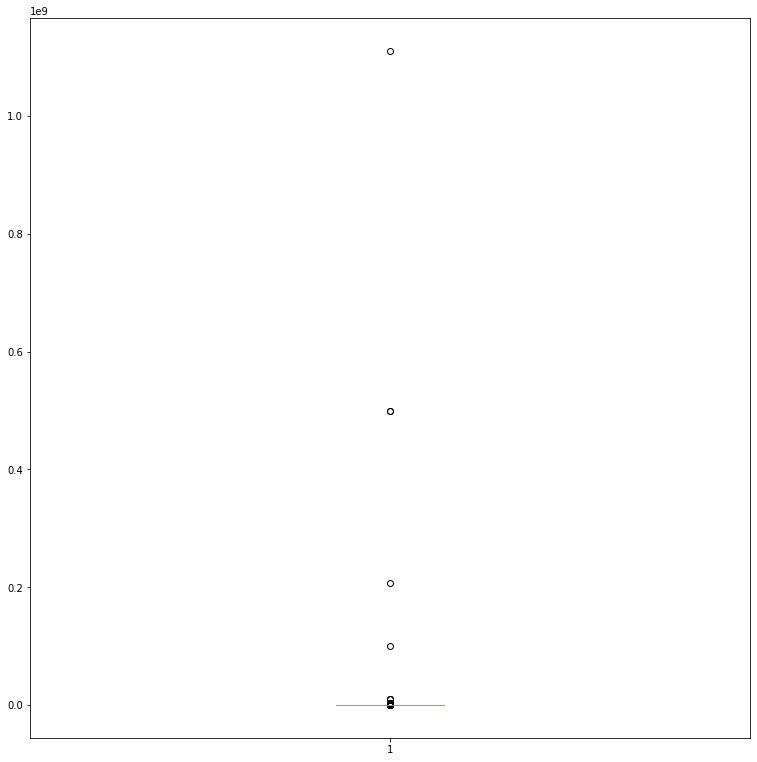

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Boxplot before removing outliers
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(droped_df['Mileage_km'])

In [25]:
# Remove outliers for Mileage_km
Q1 = droped_df['Mileage_km'].quantile(0.25)
Q3 = droped_df['Mileage_km'].quantile(0.75)
IQR = Q3 - Q1
filter_mask = (droped_df['Mileage_km'] >= Q1 - 1.5*IQR) & (droped_df['Mileage_km'] <= Q3 + 1.5*IQR)
outliersToBeDropped =droped_df.shape[0] - droped_df.loc[filter_mask].shape[0]
print(f'we will drop {outliersToBeDropped} rows')
droped_df = droped_df.loc[filter_mask]

we will drop 608 rows


We have 8821 with 1.0 Km which is most likely the new cars.
We will mark the new cars that have Mileage_km > 100 km as used cars.

In [26]:
# what is the most frequent Mileage_km?
print(droped_df['Mileage_km'].value_counts())
print(droped_df['Condition'].value_counts())
filter_mask =  ((droped_df['Condition'] == 'New') & (droped_df['Mileage_km'] > 100.0))
droped_df.loc[filter_mask].shape[0]

1.0         8821
5.0         6797
10.0        3131
220000.0    1158
180000.0    1148
            ... 
57569.0        1
188508.0       1
151641.0       1
169620.0       1
18712.0        1
Name: Mileage_km, Length: 51200, dtype: int64
Used    179908
New      23544
Name: Condition, dtype: int64


777

We have 777 vehicle that have crossed 100 km and it's condition is new.
we will change it's condition to used.

In [27]:
droped_df.loc[filter_mask, 'Condition'] = 'Used'

Mean Price of a car by Fuel_type.

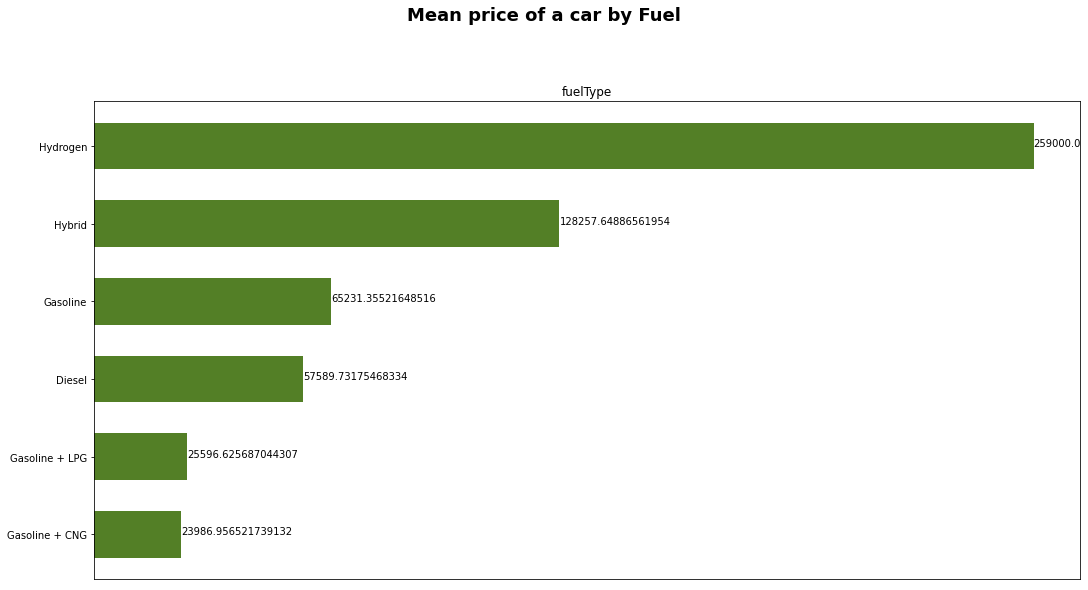

In [43]:
groupByFuel = droped_df.groupby('Fuel_type')['Price'].mean().sort_values()
fig, ax = plt.subplots(1,1, figsize=[15,7], constrained_layout=True)
plt.suptitle("Mean price of a car by Fuel",y=1.15, size=18, weight='bold')
ax.barh(groupByFuel.index, groupByFuel, 0.6, color = '#537f26')
ax.set_title("fuelType")
ax.set_xticks([])
for index, value in enumerate(groupByFuel):
    ax.text(value, index, str(value))

After Cleaning the data we have to focus more on some brands that are most selling, so let's say TOP10 cars.

What is the most famouse 10 vehicles in Poland ?

In [28]:
Top10 = droped_df['Vehicle_brand'].value_counts()[:10]
brandsArray = list(Top10.keys())
Top10

Volkswagen       17905
BMW              16456
Audi             16238
Opel             16099
Ford             15836
Mercedes-Benz    11665
Renault          10487
Toyota           10125
Škoda            10009
Peugeot           8847
Name: Vehicle_brand, dtype: int64

Visualize the results with histogram and bokeh.

In [29]:
hover_tool = HoverTool()
p = figure(x_range=brandsArray, title="Most advertised brands in Poland",
            tools=[hover_tool], x_axis_label='brand', y_axis_label='Advertisements')

p.vbar(x=brandsArray, top=Top10.values, width=0.8)

p.xgrid.grid_line_color = None
p.y_range.start = 4000
show(p)

Let's see the top 5 numbers more clearly. starting with 10000 ads. 

In [30]:
hover_tool = HoverTool()
p = figure(x_range=brandsArray, title="Most advertised brands in Poland Start with 10000",
           toolbar_location=None, tools=[hover_tool], x_axis_label='brand', y_axis_label='Advertisements')

p.vbar(x=brandsArray, top=Top10.values, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 10000
show(p)

Now let's see some statistics for each Brand, so we will group them by Vehicle_brand.

In [31]:
grouped = droped_df.groupby('Vehicle_brand')

Is the prices of the cars increase over time (production year)?, Before 1970 there were no much cars produced/for sale so we will ignore them to make the the same start for all the vehicles.

In [32]:
from bokeh.layouts import row,column, gridplot

figures = []

for brand in brandsArray:
    # get the current Brand
    brandDf = grouped.get_group(brand)
    
    # sort them on the production_year 
    sortedYear = brandDf.sort_values(by=['Production_year'])
    
    # remove the rows that after 1970
    mask = (sortedYear['Production_year'] >= 1970)
    sortedYear = sortedYear.loc[mask]
    x = sortedYear['Production_year']
    y = sortedYear['Price']
    hover_tool = HoverTool()
    # plot the graph where the time on y axis, price on x-axis
    PriceOverYears = figure(title='Prices over years', x_axis_label='Time in Years', y_axis_label='Price in 1000 PLN', tools=[hover_tool])
    PriceOverYears.line(x.values, y.values / 1000, legend_label=brand)
    figures.append((PriceOverYears))

g=gridplot(figures, ncols=3)
show(g)

The prices of the brands increases as the Production Year increases in most of the brands.

Let's see what is the average Prices of each brand to know which brand is cheap and which is expensive.

In [33]:
hover_tool = HoverTool()
avg_for_each_brand = []
for brand in brandsArray:
    brandDf = grouped.get_group(brand)
    avg_for_each_brand.append(brandDf['Price'].mean()/1000.0)

p = figure(x_range=brandsArray, title="Average Prices of each brand", x_axis_label='brand', y_axis_label = 'Avg Price (1000 PLN)'
           ,toolbar_location=None, tools=[hover_tool])

p.vbar(x=brandsArray, top=avg_for_each_brand, width=0.9)

p.y_range.start = 0
show(p)


Mercedes-Benz, BMW and Audi are the most expensive brands respectively.

Can the Mileage_km can affect the price?

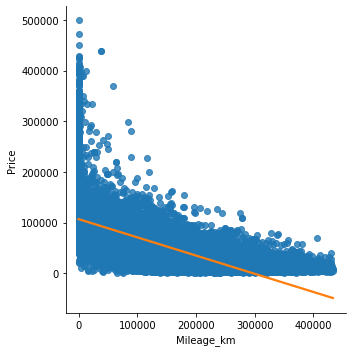

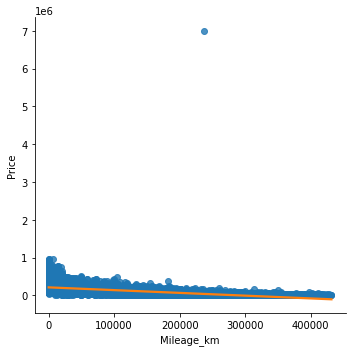

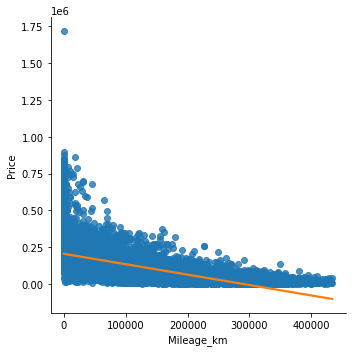

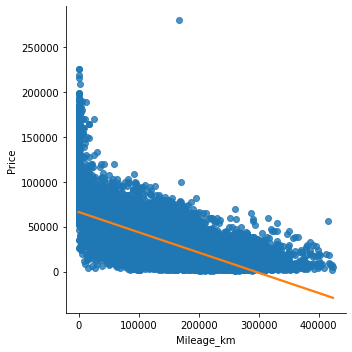

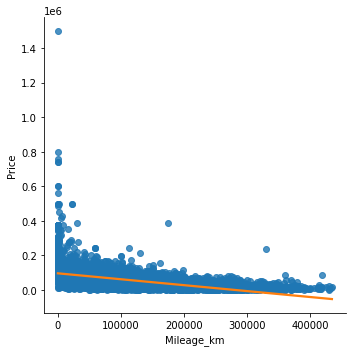

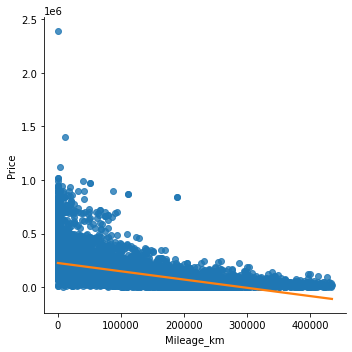

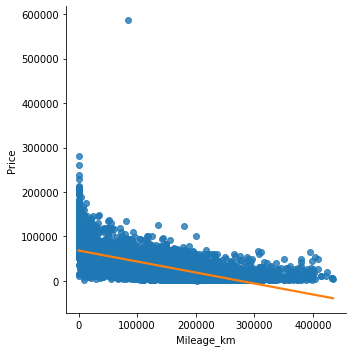

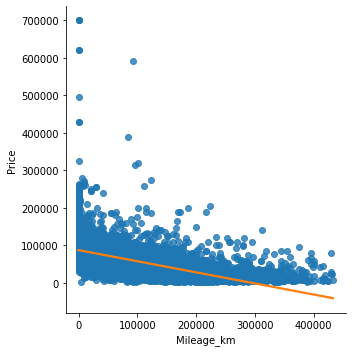

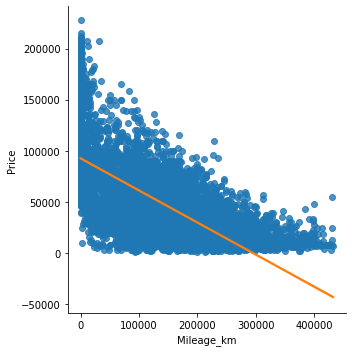

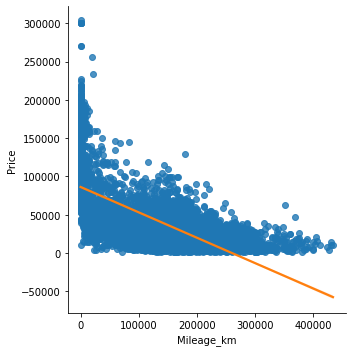

In [34]:
from bokeh.layouts import row,column, gridplot

figures = []

for brand in brandsArray:
    # get the current Brand
    brandDf = grouped.get_group(brand)
    
    # sort them on the Mileage_km
    sortedYear = brandDf.sort_values(by=['Mileage_km'])
    
    x = sortedYear['Mileage_km']
    y = sortedYear['Price']
    z = {}
    z['Mileage_km'] = x
    z['Price'] = y

    # plot a graph that have regression line where the Mileage_km on y axis, price on x-axis    
    sns.lmplot(data=pd.DataFrame.from_dict(z), x='Mileage_km', y='Price',order=1, line_kws={"color": "C1"})



In all the cases the relation is strong inversly proportional.
When the Mileage_km increases the Price decreases.

Now we want to know how strong the attributes are related to each other. We can get this by Feature correlation matrix.

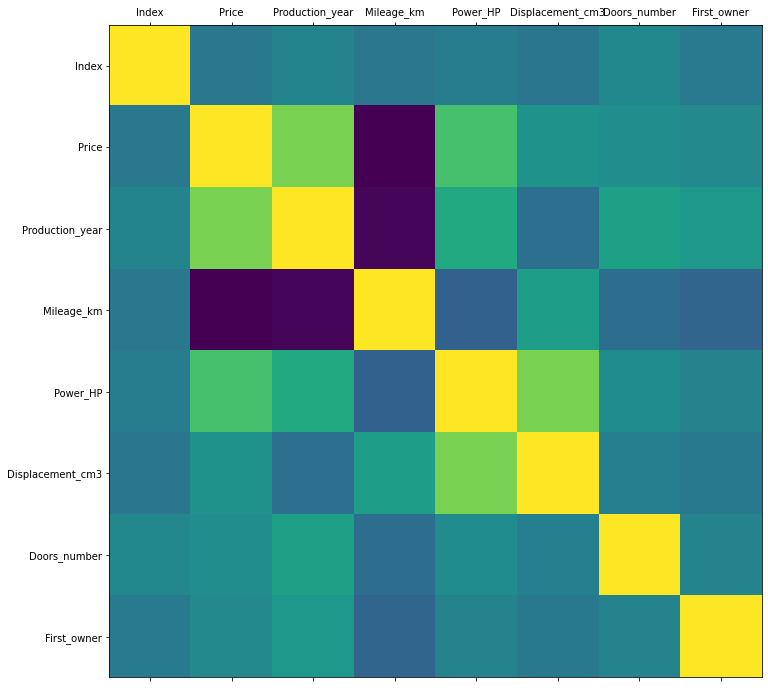

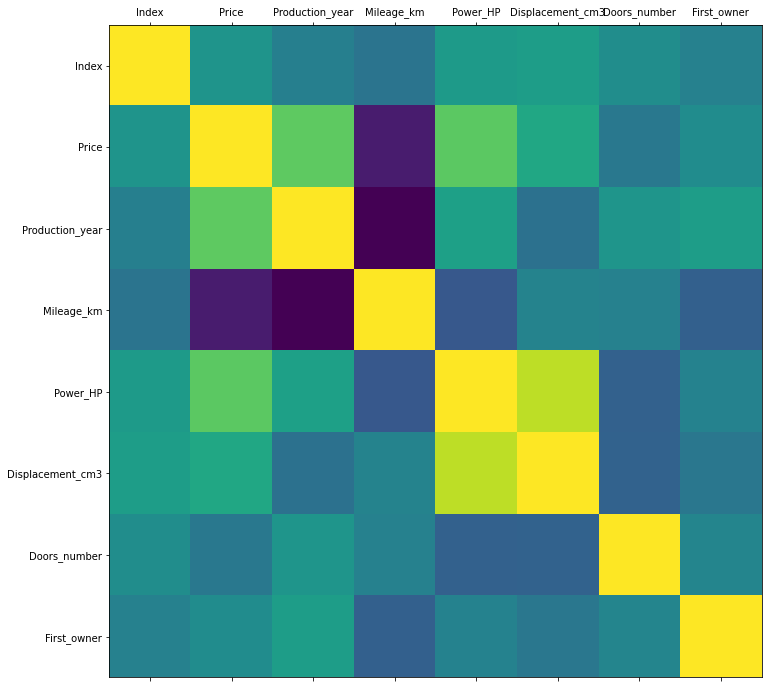

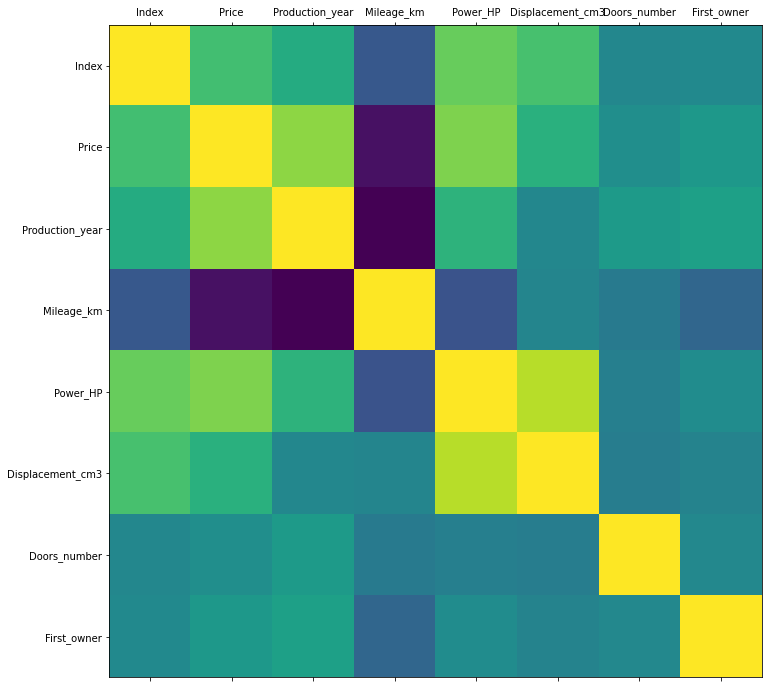

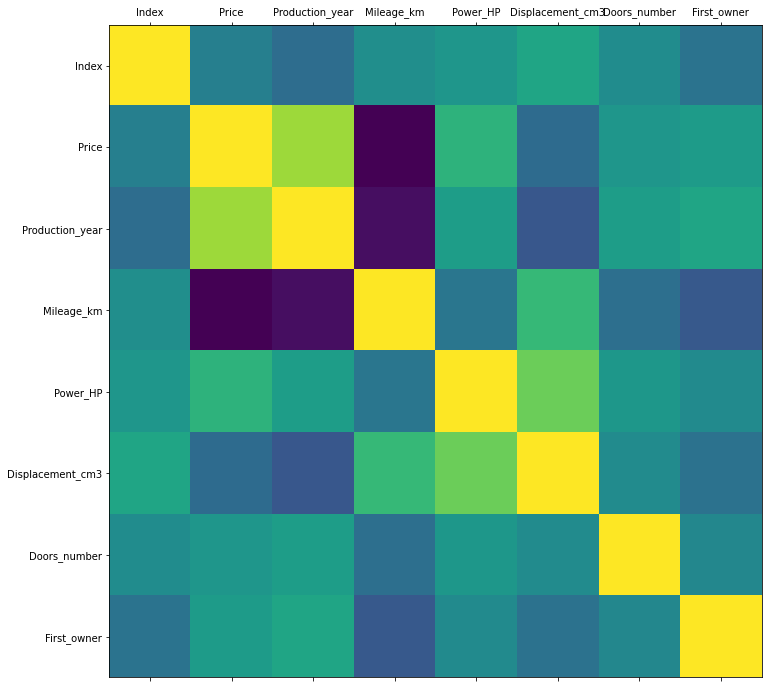

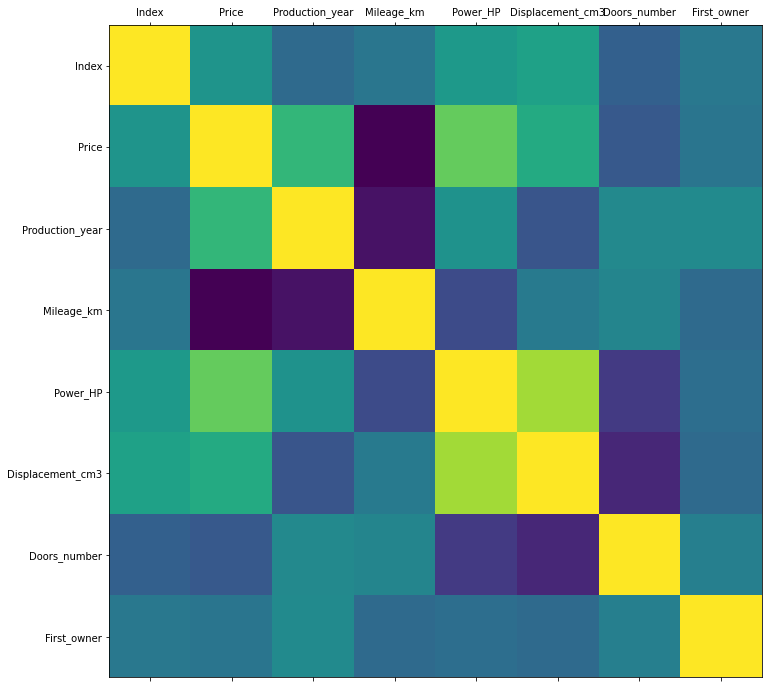

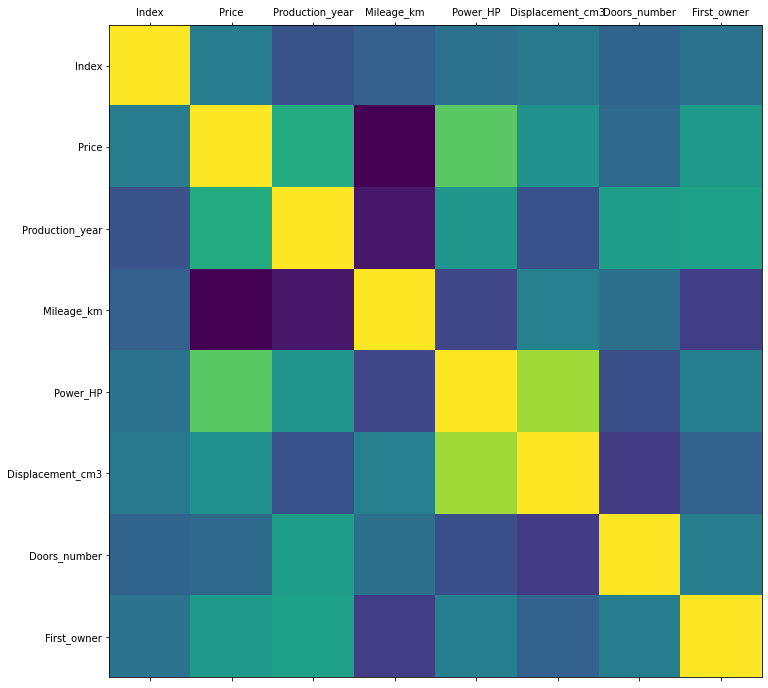

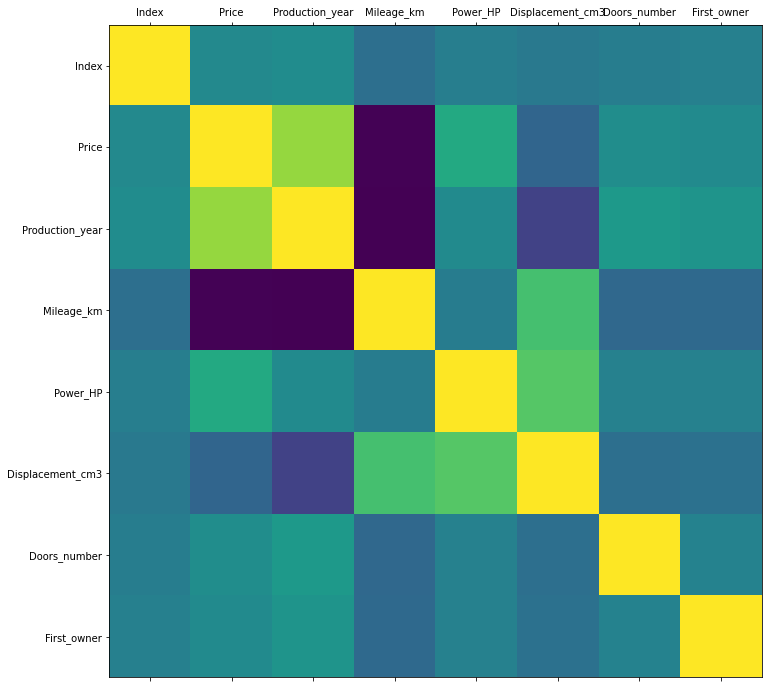

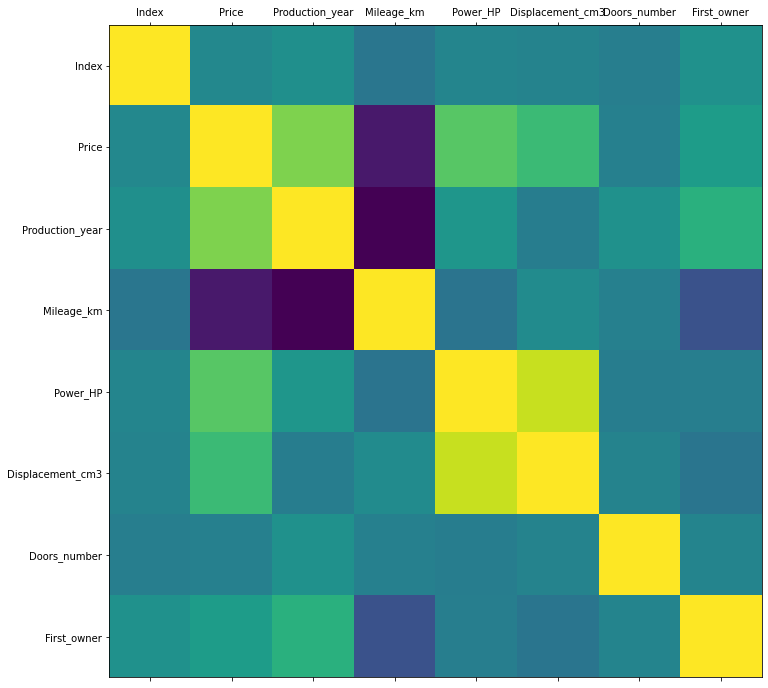

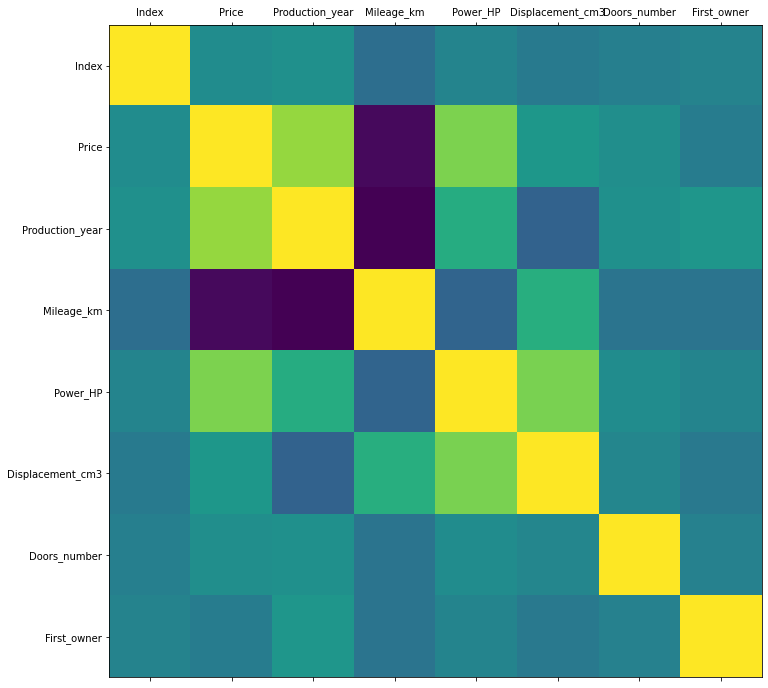

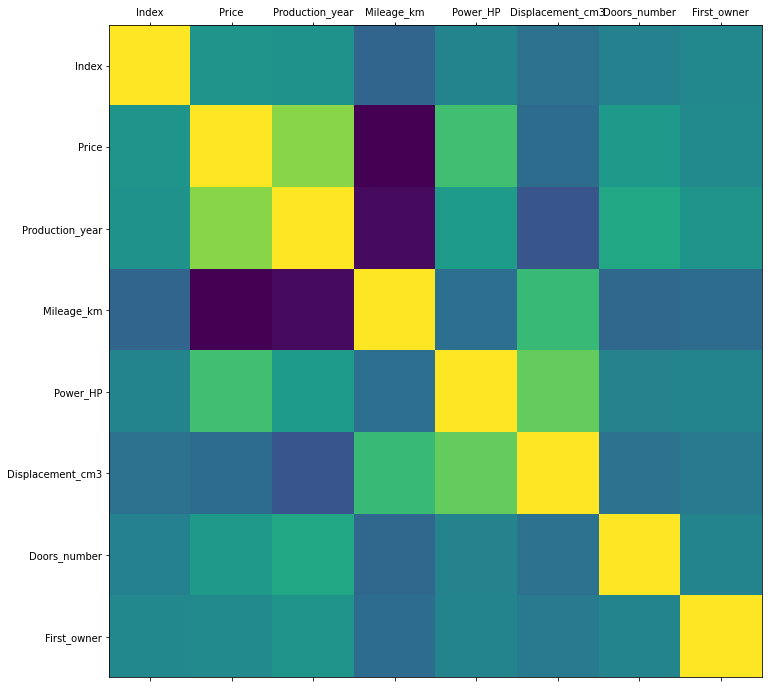

In [35]:
for brand in brandsArray:
    corr = grouped.get_group(brand).corr()
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

Some observations from this feature correlation matrix:

* Price is inverse correlated with Mileage_km as shown in the previous graphs, and also correlated with Power_HP.

* (Displacement_cm3) is highly correlated with Power_HP we can remove the Displacement_cm3.

* And Mileage_km has high inverse correlation with Production Year.

.